In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Read data files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check data shape
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [ ]:
# Divide to numerical and categorical features
num_feats = train_df.dtypes[train_df.dtypes != 'object'].index
print("Number of numerical features: ", len(num_feats))
cat_feats = train_df.dtypes[train_df.dtypes == 'object'].index
print("Number of categorical features: ", len(cat_feats))

Number of numerical features:  38
Number of categorical features:  43


In [ ]:
print("Numerical features: ", train_df[num_feats].columns)
print("Categorical features: ", train_df[cat_feats].columns)

Numerical features:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical features:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFi

In [ ]:
# Detect outliers and remove them
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_range = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_range) | (df[col] > Q3 + outlier_range)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train_df, 2, train_df[num_feats].columns.drop('SalePrice'))
train_df.loc[outliers_to_drop]
train_df = train_df.drop(outliers_to_drop, axis=0).reset_index(drop=True)
train_df.shape

(1338, 81)

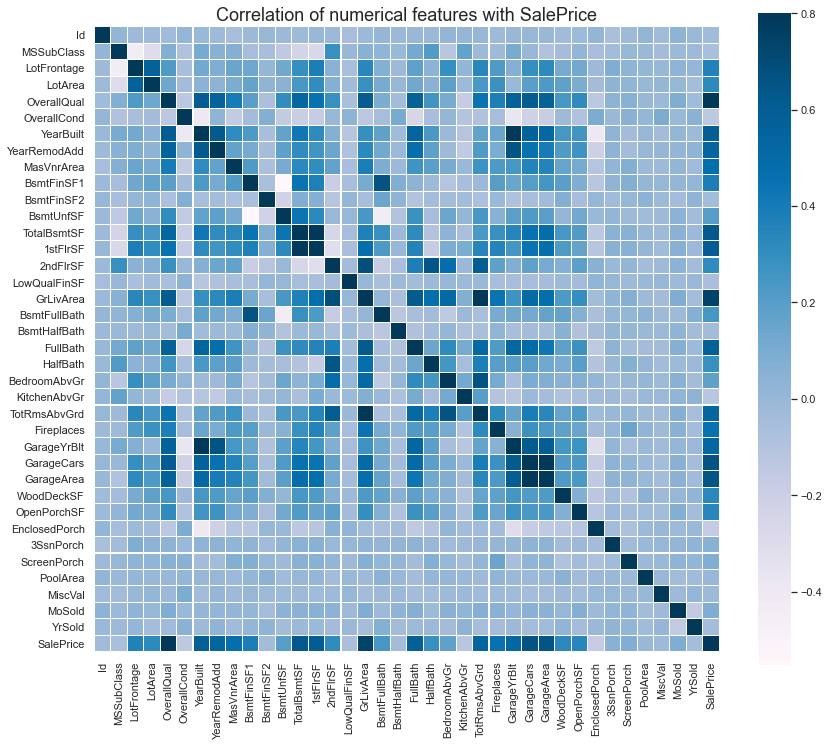

In [ ]:
#Visualize correlations among numerical features
corr_data = train_df[num_feats]
colormap = plt.cm.PuBu
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize = (14, 12))
plt.title('Correlation of numerical features with SalePrice', y=1, size=18)
sns.heatmap(corr_data.corr(), square=True, linewidths=0.1, cmap=colormap,linecolor='white', vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


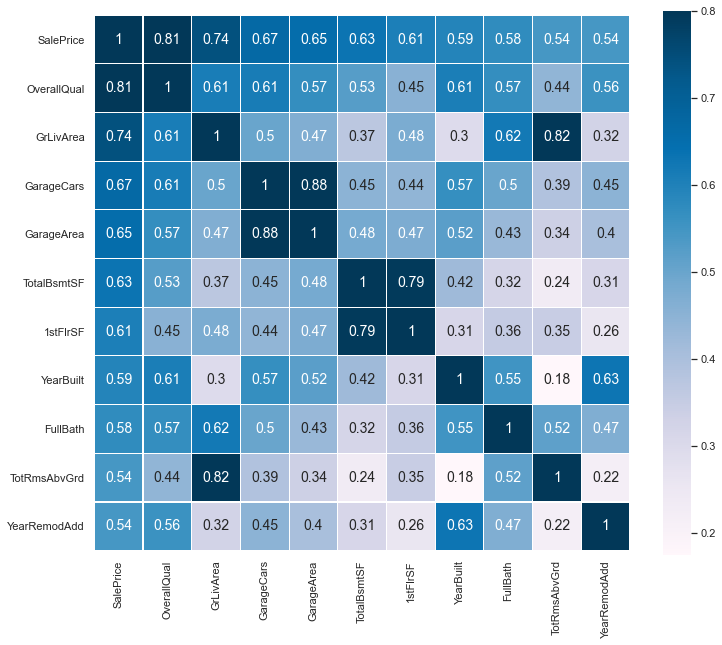

In [ ]:
k = 11
cols = corr_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train_df[cols].values.T)
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(cm, vmax=0.8, linewidths=0.1, square=True, annot=True, cmap=colormap, linecolor="white", 
            xticklabels=cols.values, annot_kws={'size':14}, yticklabels=cols.values)

In [ ]:
# Categorical features
for cat in list(cat_feats):
    print(train_df[cat].value_counts())
    print('-'*50)

RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1335
Grvl       3
Name: Street, dtype: int64
--------------------------------------------------
Grvl    42
Pave    37
Name: Alley, dtype: int64
--------------------------------------------------
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1211
Bnk      52
HLS      48
Low      27
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1338
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     972
Corner     235
CulDSac     81
FR2         46
FR3          4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1275
Mod      56
Sev       7
Name: LandSlope, dtype: int64
--------------------------------------------------
NAmes      20

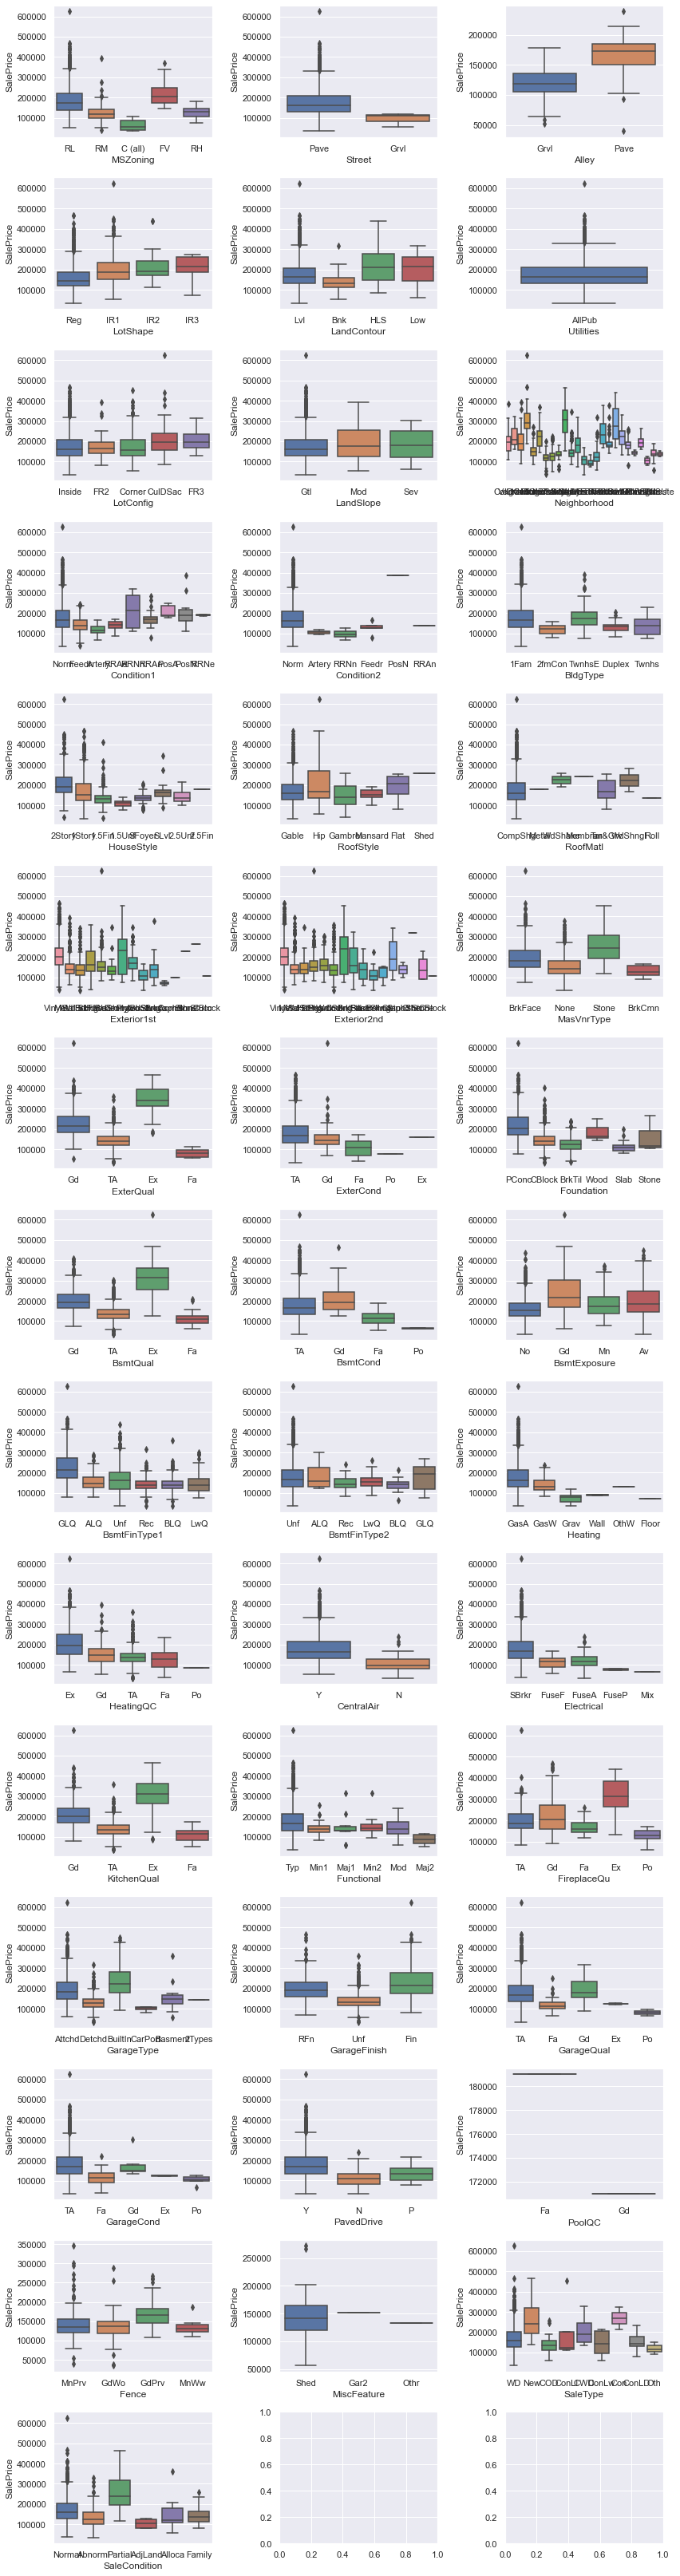

In [ ]:
cat_feats_list = list(cat_feats)
n_rows = 15
n_cols = 3

f, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cat_feats_list):
            sns.boxplot(x=cat_feats_list[i], y=train_df['SalePrice'], data=train_df, ax=axs[r][c])

plt.tight_layout()
plt.show()

In [ ]:
num_strong_corr = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
cat_strong_corr = ['MSZoning', 'Neighborhood', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
cat_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
                 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']

Skewness: 1.287364
Kurtosis: 2.555029


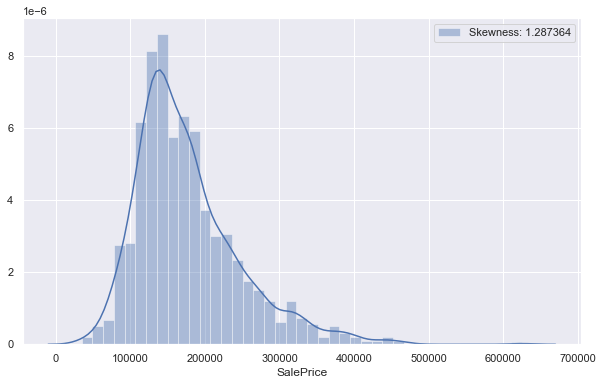

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(train_df['SalePrice'], color='b', label='Skewness: {:2f}'.format(train_df['SalePrice'].skew()), ax=ax)
g = g.legend(loc = 'best')
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: -0.032026
Kurtosis: 0.571897


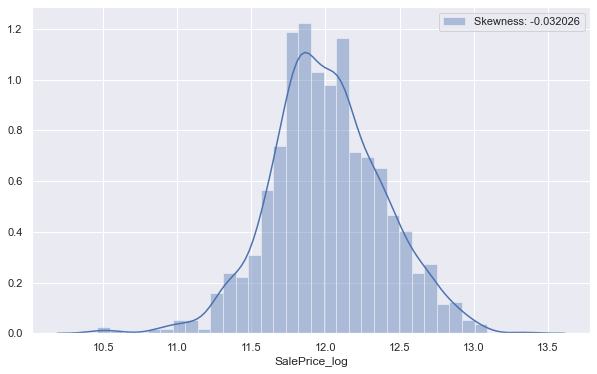

In [ ]:
train_df['SalePrice_log'] = train_df['SalePrice'].map(lambda i: np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(train_df['SalePrice_log'], color='b', label='Skewness: {:2f}'.format(train_df['SalePrice_log'].skew()), ax=ax)
g = g.legend(loc = 'best')
print("Skewness: %f" % train_df['SalePrice_log'].skew())
print("Kurtosis: %f" % train_df['SalePrice_log'].kurt())
train_df.drop('SalePrice', axis=1, inplace=True)

In [ ]:
print("Train----------------------")
for col in train_df.columns:
    missingperc = 'column: {}\t Nan value: {:.2f}%'.format(col, 100*(train_df[col].isnull().sum() / train_df[col].shape[0]))
    print(missingperc)
print("Test----------------------")
for col in test_df.columns:
    missingperc = 'column: {}\t Nan value: {:.2f}%'.format(col, 100*(test_df[col].isnull().sum() / test_df[col].shape[0]))
    print(missingperc)

Train----------------------
column: Id	 Nan value: 0.00%
column: MSSubClass	 Nan value: 0.00%
column: MSZoning	 Nan value: 0.00%
column: LotFrontage	 Nan value: 17.12%
column: LotArea	 Nan value: 0.00%
column: Street	 Nan value: 0.00%
column: Alley	 Nan value: 94.10%
column: LotShape	 Nan value: 0.00%
column: LandContour	 Nan value: 0.00%
column: Utilities	 Nan value: 0.00%
column: LotConfig	 Nan value: 0.00%
column: LandSlope	 Nan value: 0.00%
column: Neighborhood	 Nan value: 0.00%
column: Condition1	 Nan value: 0.00%
column: Condition2	 Nan value: 0.00%
column: BldgType	 Nan value: 0.00%
column: HouseStyle	 Nan value: 0.00%
column: OverallQual	 Nan value: 0.00%
column: OverallCond	 Nan value: 0.00%
column: YearBuilt	 Nan value: 0.00%
column: YearRemodAdd	 Nan value: 0.00%
column: RoofStyle	 Nan value: 0.00%
column: RoofMatl	 Nan value: 0.00%
column: Exterior1st	 Nan value: 0.00%
column: Exterior2nd	 Nan value: 0.00%
column: MasVnrType	 Nan value: 0.52%
column: MasVnrArea	 Nan value: 

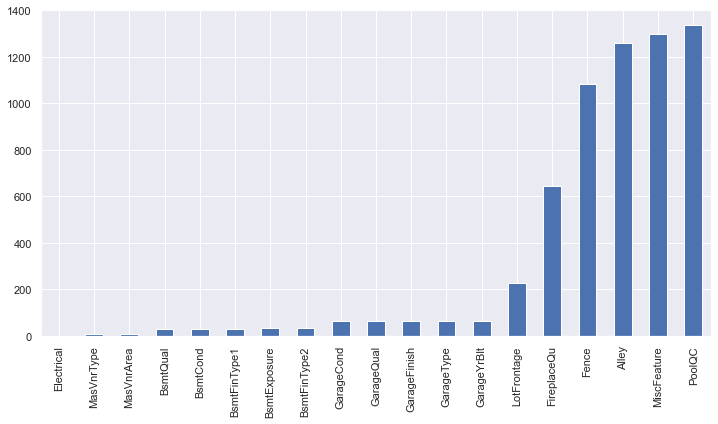

In [ ]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12, 6))

In [ ]:
cat_missing = []
for col in cat_feats:
    if train_df[col].isnull().sum() > 0:
        cat_missing.append(col)

for col in cat_missing:
    train_df[col].fillna('None', inplace=True)
    test_df[col].fillna('None', inplace=True)
    
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,229,0.171151
GarageYrBlt,65,0.048580
MasVnrArea,7,0.005232
SalePrice_log,0,0.000000
ExterCond,0,0.000000


In [ ]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SalePrice_log,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [ ]:
id_test = test_df['Id']
num_feats_drop = num_weak_corr
cat_feats_drop = cat_weak_corr

cols_drop = ['Id'] + num_feats_drop + cat_feats_drop
for df in [train_df, test_df]:
    df.drop(cols_drop, axis=1, inplace=True)
train_df.head()

,MSZoning,Neighborhood,OverallQual,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SaleType,SalePrice_log
0,RL,CollgCr,7,BrkFace,Gd,Gd,856,Y,SBrkr,856,1710,Gd,2,548,WD,12.247694
1,RL,Veenker,6,None,TA,Gd,1262,Y,SBrkr,1262,1262,TA,2,460,WD,12.109011
2,RL,CollgCr,7,BrkFace,Gd,Gd,920,Y,SBrkr,920,1786,Gd,2,608,WD,12.317167
3,RL,Crawfor,7,None,TA,TA,756,Y,SBrkr,961,1717,Gd,3,642,WD,11.849398
4,RL,NoRidge,8,BrkFace,Gd,Gd,1145,Y,SBrkr,1145,2198,Gd,3,836,WD,12.429216


In [ ]:
train_df.shape, test_df.shape

((1338, 16), (1459, 15))

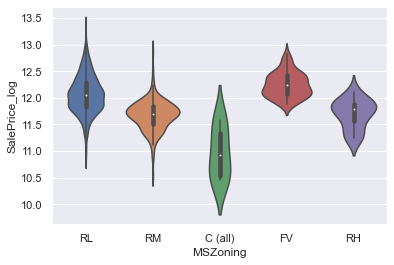

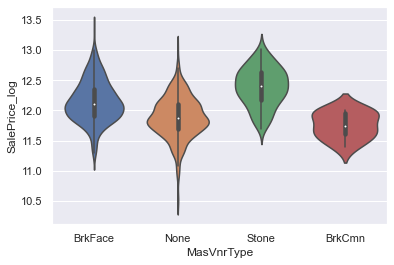

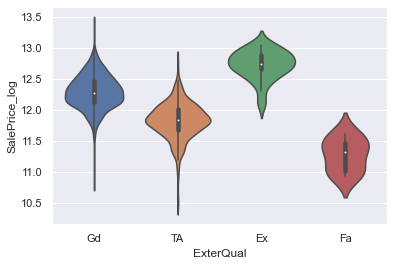

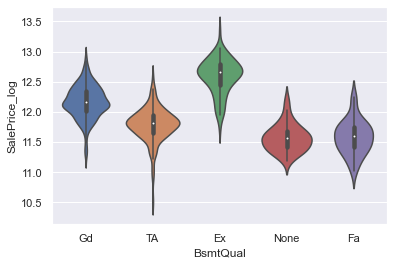

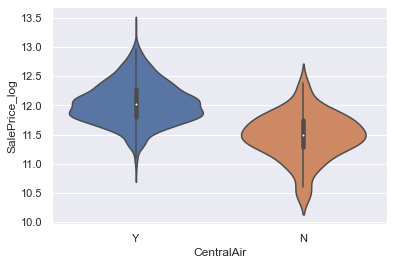

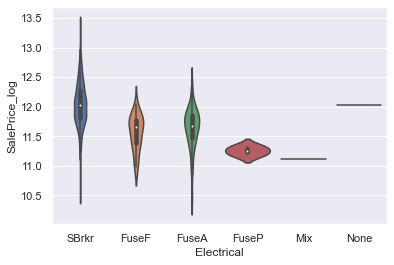

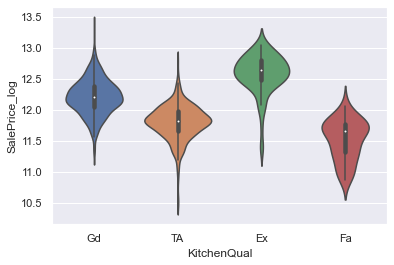

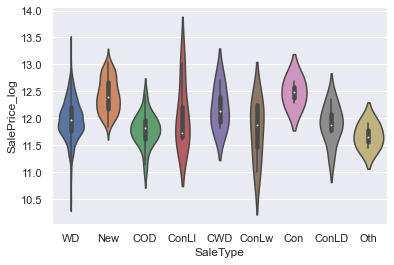

In [ ]:
cat_feats_list = cat_strong_corr.copy()
cat_feats_list.remove('Neighborhood')

for cat in cat_feats_list:
    sns.violinplot(x=cat, y=train_df['SalePrice_log'], data=train_df)
    plt.show()

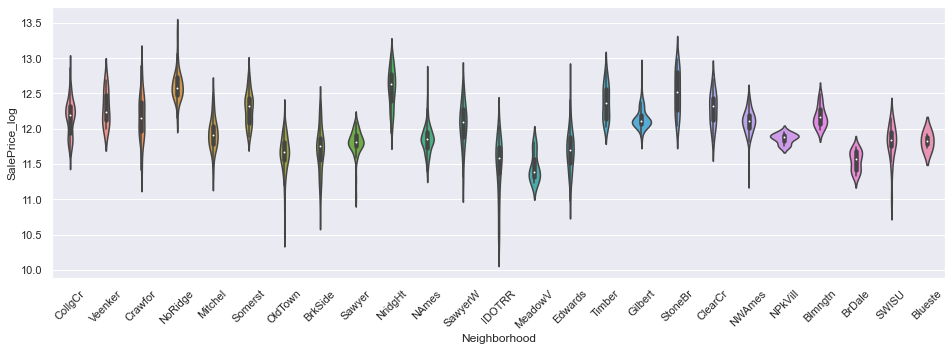

In [ ]:
f, ax = plt.subplots()
f.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=train_df['SalePrice_log'], data=train_df, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [ ]:
for cat in cat_feats_list:
    g = train_df.groupby(cat)['SalePrice_log'].mean()
    print(g)

MSZoning
C (all)    10.960733
FV         12.246616
RH         11.700602
RL         12.069474
RM         11.677434
Name: SalePrice_log, dtype: float64
MasVnrType
BrkCmn     11.757397
BrkFace    12.150038
None       11.884715
Stone      12.391766
Name: SalePrice_log, dtype: float64
ExterQual
Ex    12.727937
Fa    11.274881
Gd    12.295102
TA    11.828332
Name: SalePrice_log, dtype: float64
BsmtQual
Ex      12.595497
Fa      11.585725
Gd      12.170320
None    11.572903
TA      11.791989
Name: SalePrice_log, dtype: float64
CentralAir
N    11.471479
Y    12.042717
Name: SalePrice_log, dtype: float64
Electrical
FuseA    11.641350
FuseF    11.565700
FuseP    11.256345
Mix      11.112448
None     12.028739
SBrkr    12.047595
Name: SalePrice_log, dtype: float64
KitchenQual
Ex    12.582467
Fa    11.514567
Gd    12.209558
TA    11.800968
Name: SalePrice_log, dtype: float64
SaleType
COD      11.788173
CWD      12.198344
Con      12.483911
ConLD    11.900627
ConLI    12.044878
ConLw    11.769706
N

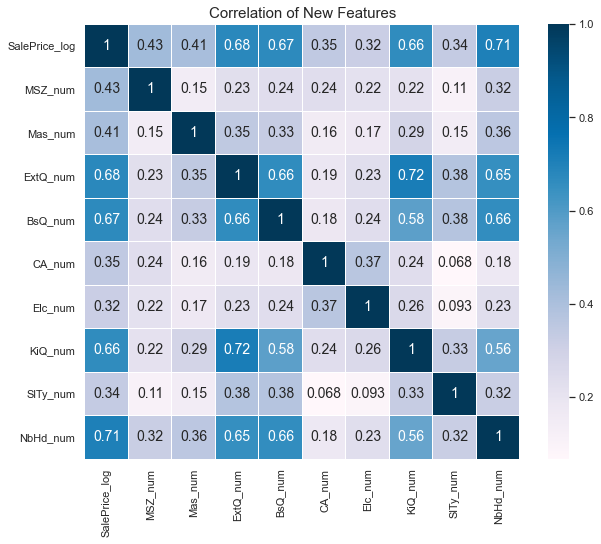

In [ ]:
msz_cat2 = ['RM', 'RH']
msz_cat3 = ['RL', 'FV']

mas_cat2 = ['Stone', 'BrkFace']

nbhd_cat2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_cat3 = ['NoRidge', 'NridgHt', 'StoneBr']

st_cat1 = ['Oth']
st_cat3 = ['CWD']
st_cat4 = ['New', 'Con']

for df in [train_df, test_df]:
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(msz_cat2)), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_cat3)), 'MSZ_num'] = 3
    
    df['Mas_num'] = 1
    df.loc[(df['MasVnrType'].isin(mas_cat2)), 'Mas_num'] = 2
    
    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA'), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd'), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex'), 'ExtQ_num'] = 4
    
    df['BsQ_num'] = 1 
    df.loc[(df['BsmtQual'] == 'Gd'), 'BsQ_num'] = 2 
    df.loc[(df['BsmtQual'] == 'Ex'), 'BsQ_num'] = 3
    
    df['CA_num'] = 0 
    df.loc[(df['CentralAir'] == 'Y'), 'CA_num'] = 1
    
    df['Elc_num'] = 1 
    df.loc[(df['Electrical'] == 'SBrkr'), 'Elc_num'] = 2 
    
    df['KiQ_num'] = 1 
    df.loc[(df['KitchenQual'] == 'TA'), 'KiQ_num'] = 2 
    df.loc[(df['KitchenQual'] == 'Gd'), 'KiQ_num'] = 3 
    df.loc[(df['KitchenQual'] == 'Ex'), 'KiQ_num'] = 4
    
    df['SlTy_num'] = 2 
    df.loc[(df['SaleType'].isin(st_cat1)), 'SlTy_num'] = 1 
    df.loc[(df['SaleType'].isin(st_cat3)), 'SlTy_num'] = 3 
    df.loc[(df['SaleType'].isin(st_cat4)), 'SlTy_num'] = 4
    
    df['NbHd_num'] = 1 
    df.loc[(df['Neighborhood'].isin(nbhd_cat2)), 'NbHd_num'] = 2 
    df.loc[(df['Neighborhood'].isin(nbhd_cat3)), 'NbHd_num'] = 3

new_col_HM = train_df[['SalePrice_log', 'MSZ_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num', 'NbHd_num']]
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title('Correlation of New Features', y=1, size=15)
sns.heatmap(new_col_HM.corr(), linewidths=0.1, vmax=1.0, square=True, annot=True, cmap=colormap, linecolor="white", annot_kws={'size':14})    

In [ ]:
train_df.drop(['MSZoning', 'Neighborhood', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'MSZ_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)
test_df.drop(['MSZoning', 'Neighborhood', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'MSZ_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)

In [ ]:
train_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice_log,ExtQ_num,BsQ_num,KiQ_num,NbHd_num
0,7,856,856,1710,2,548,12.247694,3,2,3,2
1,6,1262,1262,1262,2,460,12.109011,2,2,2,2
2,7,920,920,1786,2,608,12.317167,3,2,3,2
3,7,756,961,1717,3,642,11.849398,2,1,3,2
4,8,1145,1145,2198,3,836,12.429216,3,2,3,3


In [ ]:
test_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,ExtQ_num,BsQ_num,KiQ_num,NbHd_num
0,5,882.0,896,896,1.0,730.0,2,1,2,1
1,6,1329.0,1329,1329,1.0,312.0,2,1,3,1
2,5,928.0,928,1629,2.0,482.0,2,2,2,2
3,6,926.0,926,1604,2.0,470.0,2,1,3,2
4,8,1280.0,1280,1280,2.0,506.0,3,2,3,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = train_df.drop('SalePrice_log', axis=1).values
target_label = train_df['SalePrice_log'].values
X_test = test_df.values
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2000)

In [ ]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.005, min_child_weight = 1, max_depth = 3, 
                                 subsample = 0.5, n_estimators = 2000, random_state = 7)
regressor.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=16, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

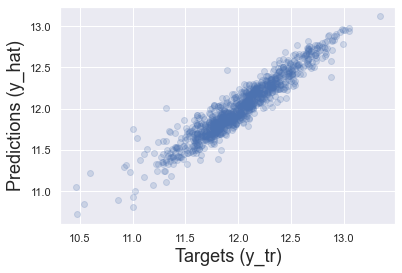

0.9009328307908078

In [ ]:
y_hat = regressor.predict(X_tr)
plt.scatter(y_tr, y_hat, alpha=0.2)
plt.xlabel('Targets (y_tr)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()
regressor.score(X_tr, y_tr)

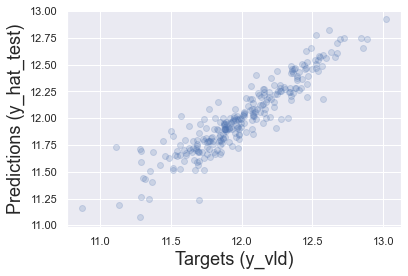

0.8505556209772009

In [ ]:
y_hat_test = regressor.predict(X_vld)
plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()
regressor.score(X_vld, y_vld)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=regressor, X=X_tr, y=y_tr, cv=10)
print(accuracy.mean(), accuracy.std())

0.8517886556267695 0.035000423432274955


In [ ]:
use_logvals = 1

pred_xgb = regressor.predict(X_test)
sub_xgb = pd.DataFrame()
sub_xgb['Id'] = id_test
sub_xgb['SalePrice'] = pred_xgb

if use_logvals == 1:
    sub_xgb['SalePrice'] = np.exp(sub_xgb['SalePrice'])
    
sub_xgb.to_csv('xgb_2.csv', index=False)